In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
df_beha = pd.read_csv('../../data/Behavioral/AllData.csv')#, nrows=1000)

df_psd_cluster = pd.read_csv("../../data/EEG/RestingEEG_PSD_Cluster.csv") #, nrows=1000)
df_psd_channel = pd.read_csv("../../data/EEG/RestingEEG_PSD_Channel.csv") #, nrows=5)
df_spectro_cluster = pd.read_csv("../../data/EEG/RestingEEG_Spectro_Cluster.csv") #, nrows=1000)
df_spectro_channel = pd.read_csv("../../data/EEG/RestingEEG_Spectro_Channel.csv") #, nrows=5)

df_microstate = pd.read_csv("../../data/EEG/RestingEEG_Microstates.csv") #, nrows=5)

/home/tristan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (66,68,80,81,82,83,84,95,96,97,98,99,110,111,112,113,114,125,126,127,128,129,140,141,142,144,155,156,157,159,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1

# Behavioral data

In [57]:
# Extract relevant info from the Behavioral data 
y_labels = df_beha[["Patient_ID", "Age", "DX_01_Cat"]]
y_labels_healthy = y_labels[y_labels["DX_01_Cat"].str.contains("No Diagnosis Given") == True]

y_labels = y_labels[["Patient_ID", "Age"]]
y_labels_healthy = y_labels_healthy[["Patient_ID", "Age"]]
y_labels_healthy

,Patient_ID,Age
9,NDARCF462HNM,14.216632
11,NDARFC233RND,9.153661
22,NDARDT800YVF,17.510381
25,NDARZT011LBZ,7.760209
26,NDARKV482FU9,10.977298
...,...,...
2088,NDARAV069HGT,13.896189
2089,NDARZC497BFU,17.419917
2090,NDARDZ737LG9,13.031143
2094,NDARRT283RHB,10.712069


# Power Sepectrum Cluster data

In [4]:
### Extract relevant info from the power spectral density of EEG data

## Front part of the skull

# Left front of the skull
df_psd_cluster_lfront = df_psd_cluster.filter(regex='lfront')
df_psd_cluster_lfront_eyesclosed = pd.concat([df_psd_cluster['id'], df_psd_cluster_lfront.filter(regex='eyesclosed')], axis=1)
df_psd_cluster_lfront_eyesopen = pd.concat([df_psd_cluster['id'], df_psd_cluster_lfront.filter(regex='eyesopen')], axis=1)

df_psd_cluster_lfront_eyesclosed.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_psd_cluster_lfront_eyesopen.rename(columns={'id': 'Patient_ID'}, inplace=True)

# Middle front of the skull
df_psd_cluster_mfront = df_psd_cluster.filter(regex='mfront')
df_psd_cluster_mfront_eyesclosed = pd.concat([df_psd_cluster['id'], df_psd_cluster_mfront.filter(regex='eyesclosed')], axis=1)
df_psd_cluster_mfront_eyesopen = pd.concat([df_psd_cluster['id'], df_psd_cluster_mfront.filter(regex='eyesopen')], axis=1)

df_psd_cluster_mfront_eyesclosed.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_psd_cluster_mfront_eyesopen.rename(columns={'id': 'Patient_ID'}, inplace=True)

# Right front of the skull
df_psd_cluster_rfront = df_psd_cluster.filter(regex='rfront')
df_psd_cluster_rfront_eyesclosed = pd.concat([df_psd_cluster['id'], df_psd_cluster_rfront.filter(regex='eyesclosed')], axis=1)
df_psd_cluster_rfront_eyesopen = pd.concat([df_psd_cluster['id'], df_psd_cluster_rfront.filter(regex='eyesopen')], axis=1)

df_psd_cluster_rfront_eyesclosed.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_psd_cluster_rfront_eyesopen.rename(columns={'id': 'Patient_ID'}, inplace=True)

## Parietal part of the skull

# Left parietal part of the skull
df_psd_cluster_lpari = df_psd_cluster.filter(regex='lpari')
df_psd_cluster_lpari_eyesclosed = pd.concat([df_psd_cluster['id'], df_psd_cluster_lpari.filter(regex='eyesclosed')], axis=1)
df_psd_cluster_lpari_eyesopen = pd.concat([df_psd_cluster['id'], df_psd_cluster_lpari.filter(regex='eyesopen')], axis=1)

df_psd_cluster_lpari_eyesclosed.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_psd_cluster_lpari_eyesopen.rename(columns={'id': 'Patient_ID'}, inplace=True)

# Middle parietal part of the skull
df_psd_cluster_mpari = df_psd_cluster.filter(regex='mpari')
df_psd_cluster_mpari_eyesclosed = pd.concat([df_psd_cluster['id'], df_psd_cluster_mpari.filter(regex='eyesclosed')], axis=1)
df_psd_cluster_mpari_eyesopen = pd.concat([df_psd_cluster['id'], df_psd_cluster_mpari.filter(regex='eyesopen')], axis=1)

df_psd_cluster_mpari_eyesclosed.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_psd_cluster_mpari_eyesopen.rename(columns={'id': 'Patient_ID'}, inplace=True)

# Right parietal part of the skull
df_psd_cluster_rpari = df_psd_cluster.filter(regex='rpari')
df_psd_cluster_rpari_eyesclosed = pd.concat([df_psd_cluster['id'], df_psd_cluster_rpari.filter(regex='eyesclosed')], axis=1)
df_psd_cluster_rpari_eyesopen = pd.concat([df_psd_cluster['id'], df_psd_cluster_rpari.filter(regex='eyesopen')], axis=1)

df_psd_cluster_rpari_eyesclosed.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_psd_cluster_rpari_eyesopen.rename(columns={'id': 'Patient_ID'}, inplace=True)

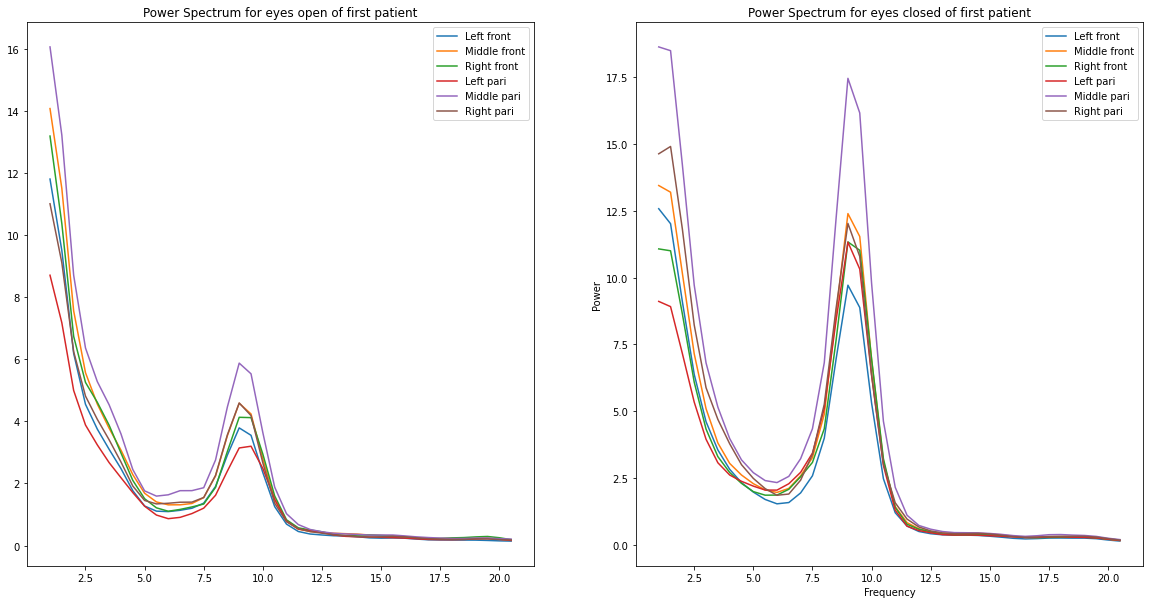

In [5]:
## Plot the power spectrums for first patient

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

freq = np.hstack((np.arange(1,58,0.5), np.arange(62.50,90.5,0.5)))

# Eyes open

power_lfront_eyesopen = np.asarray(df_psd_cluster_lfront_eyesopen.iloc[0,:])[1:]
power_mfront_eyesopen = np.asarray(df_psd_cluster_mfront_eyesopen.iloc[0,:])[1:]
power_rfront_eyesopen = np.asarray(df_psd_cluster_rfront_eyesopen.iloc[0,:])[1:]

power_lpari_eyesopen = np.asarray(df_psd_cluster_lpari_eyesopen.iloc[0,:])[1:]
power_mpari_eyesopen = np.asarray(df_psd_cluster_mpari_eyesopen.iloc[0,:])[1:]
power_rpari_eyesopen = np.asarray(df_psd_cluster_rpari_eyesopen.iloc[0,:])[1:]

plt.xlabel("Frequency")
plt.ylabel("Power")
ax1.set_title("Power Spectrum for eyes open of first patient")

ax1.plot(freq[:40], power_lfront_eyesopen[:40])
ax1.plot(freq[:40], power_mfront_eyesopen[:40])
ax1.plot(freq[:40], power_rfront_eyesopen[:40])

ax1.plot(freq[:40], power_lpari_eyesopen[:40])
ax1.plot(freq[:40], power_mpari_eyesopen[:40])
ax1.plot(freq[:40], power_rpari_eyesopen[:40])

ax1.legend(["Left front", "Middle front", "Right front", "Left pari", "Middle pari", "Right pari"])


# Eyes closed

power_lfront_eyesclosed = np.asarray(df_psd_cluster_lfront_eyesclosed.iloc[0,:])[1:]
power_mfront_eyesclosed = np.asarray(df_psd_cluster_mfront_eyesclosed.iloc[0,:])[1:]
power_rfront_eyesclosed = np.asarray(df_psd_cluster_rfront_eyesclosed.iloc[0,:])[1:]

power_lpari_eyesclosed = np.asarray(df_psd_cluster_lpari_eyesclosed.iloc[0,:])[1:]
power_mpari_eyesclosed = np.asarray(df_psd_cluster_mpari_eyesclosed.iloc[0,:])[1:]
power_rpari_eyesclosed = np.asarray(df_psd_cluster_rpari_eyesclosed.iloc[0,:])[1:]

plt.xlabel("Frequency")
plt.ylabel("Power")
ax2.set_title("Power Spectrum for eyes closed of first patient")

ax2.plot(freq[:40], power_lfront_eyesclosed[:40])
ax2.plot(freq[:40], power_mfront_eyesclosed[:40])
ax2.plot(freq[:40], power_rfront_eyesclosed[:40])

ax2.plot(freq[:40], power_lpari_eyesclosed[:40])
ax2.plot(freq[:40], power_mpari_eyesclosed[:40])
ax2.plot(freq[:40], power_rpari_eyesclosed[:40])

ax2.legend(["Left front", "Middle front", "Right front", "Left pari", "Middle pari", "Right pari"])



# Spectro Cluster Data

In [6]:
df_spectro_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)

for col in df_spectro_cluster.columns:
    print(col) 

Patient_ID
eyesclosed_fband_delta_absmean_lfront
eyesclosed_fband_delta_absmean_mfront
eyesclosed_fband_delta_absmean_rfront
eyesclosed_fband_delta_absmean_lpari
eyesclosed_fband_delta_absmean_mpari
eyesclosed_fband_delta_absmean_rpari
eyesclosed_fband_delta_relmean_lfront
eyesclosed_fband_delta_relmean_mfront
eyesclosed_fband_delta_relmean_rfront
eyesclosed_fband_delta_relmean_lpari
eyesclosed_fband_delta_relmean_mpari
eyesclosed_fband_delta_relmean_rpari
eyesclosed_fband_theta_absmean_lfront
eyesclosed_fband_theta_absmean_mfront
eyesclosed_fband_theta_absmean_rfront
eyesclosed_fband_theta_absmean_lpari
eyesclosed_fband_theta_absmean_mpari
eyesclosed_fband_theta_absmean_rpari
eyesclosed_fband_theta_relmean_lfront
eyesclosed_fband_theta_relmean_mfront
eyesclosed_fband_theta_relmean_rfront
eyesclosed_fband_theta_relmean_lpari
eyesclosed_fband_theta_relmean_mpari
eyesclosed_fband_theta_relmean_rpari
eyesclosed_fband_alpha_absmean_lfront
eyesclosed_fband_alpha_absmean_mfront
eyesclosed_fb

# Aggregation of data

In [104]:
df_psd_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_spectro_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)

df_psd_spectro_cluster = pd.merge(df_psd_cluster, df_spectro_cluster, on='Patient_ID')
df_psd_spectro_cluster_label = pd.merge(y_labels, df_psd_spectro_cluster, on='Patient_ID')

df_psd_spectro_cluster_label.dropna(inplace=True)

In [115]:
# Define Train and Test data 
total_samples = len(df_psd_spectro_cluster_label.index)
nsamples_test = int(0.1*total_samples)
df_psd_spectro_cluster_label = df_psd_spectro_cluster_label.sample(frac=1).reset_index(drop=True)

test = df_psd_spectro_cluster_label.iloc[:nsamples_test]
X_test = test.drop(['Patient_ID', 'Age'], axis=1)
y_test = test[['Age']]

train = df_psd_spectro_cluster_label.iloc[nsamples_test:]
X_train = train.drop(['Patient_ID', 'Age'], axis=1)
y_train = train[['Age']]

# Feature selection by correlation

In [125]:
corr = X_train.corrwith(y_train['Age'], axis=0, method='pearson')
feature_select = pd.DataFrame(corr.iloc[(-corr.abs()).argsort()][:20])
best_feature_names = feature_select.index.values
feature_select

,0
eyesclosed_fband_delta_relmean_mfront,-0.653330
eyesclosed_indfband_theta_relmean_mfront,-0.641694
eyesclosed_indfband_theta_relmean_lfront,-0.632360
eyesclosed_fband_delta_relmean_lfront,-0.625696
eyesclosed_indfband_theta_relmean_rfront,-0.624286
eyesclosed_fband_delta_relmean_rfront,-0.611431
eyesclosed_indfband_theta_relmean_mpari,-0.592619
eyesclosed_indfband_theta_relmean_rpari,-0.576318
eyesclosed_indfband_theta_relmean_lpari,-0.570610
eyesopen_indfband_theta_relmean_mfront,-0.568865


In [132]:
X_train_feature_extracted = X_train[best_feature_names]
X_test_feature_extracted = X_test[best_feature_names]

# Linear Regression 

In [133]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_feature_extracted, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test_feature_extracted)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[-0.75649887  0.69961658 -0.73294857 -0.03042757 -0.76312288  0.17595484
  -2.18068336  1.29661807  0.85700881 -0.01476713  0.32035925  3.60190568
   0.09742369  0.15066608  0.74280549 -0.10743709 -1.65189602  0.53127087
  -0.02982547 -0.07965275]]
Mean squared error: 6.39
Coefficient of determination: 0.50
